In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def img_show(img):
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
              'gray': {'Lower': np.array([0, 0, 46]), 'Upper': np.array([180, 43, 220])},
              'yellow': {'Lower': np.array([26, 43, 46]), 'Upper': np.array([34, 255, 255])},          
              'blue': {'Lower': np.array([100, 80, 46]), 'Upper': np.array([124, 255, 255])},
              'green': {'Lower': np.array([35, 43, 35]), 'Upper': np.array([90, 255, 255])},}

In [ ]:
# 摄像头内参
mtx = [[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]

dist = [[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]]

In [39]:
cap = cv2.VideoCapture(0)
ret, cv_img = cap.read()

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


In [42]:
gs_img = cv2.GaussianBlur(cv_img, (5, 5), 0)
hsv_img = cv2.cvtColor(gs_img, cv2.COLOR_BGR2HSV)
erode_hsv = cv2.erode(hsv_img, None, iterations=2)

In [48]:
# 找出指定颜色
inRange_hsv = cv2.inRange(erode_hsv, color_dist['yellow']['Lower'], color_dist['yellow']['Upper'])

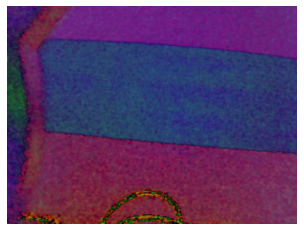

In [50]:
img_show(hsv_img)

In [ ]:
img = cv2.imread("./imgsrc/test.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img_bin=cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
img_dst = cv2.medianBlur(img_gray, 7)

In [ ]:
circle = cv2.HoughCircles(img_dst, cv2.HOUGH_GRADIENT, 1, 50,
                         param1=100, param2=100, minRadius=10, maxRadius=500)

# 将检测结果绘制在图像上
for i in circle[0, :]:  # 遍历矩阵的每一行的数据
    # 绘制圆形
    # cv2.circle(img_dst, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
    # 绘制圆心
    cv2.circle(img, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)

In [ ]:
img_show(img)